# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rafii Ahmad Fahreza
- **Email:** rafifahreza1908@gmail.com
- **Link Dataset:** https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv 

## Menentukan Pertanyaan Bisnis

1. Bagaimana distribusi pelanggan kita berdasarkan negara bagian dan kota, serta bagaimana karakteristik pembelian mereka?
2. Produk apa yang paling diminati dan menguntungkan, serta bagaimana performa penjual terkait produk tersebut?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling
Untuk memastikan data yang digunakan dalam analisis sudah bersih, lengkap, dan siap diolah.

### Gathering Data
Membaca data dari folder data, mengubah ke dalam dataframe dan menampilkan 5 baris pertamanya.

In [3]:
# Membaca file Customer
file_path = "E-Commerce Public Dataset/customers_dataset.csv"
customers_df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# Membaca file Geolocation
file_path = "E-Commerce Public Dataset/geolocation_dataset.csv"
geolocation_df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
geolocation_df.head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
# Membaca file Order Item
file_path = "E-Commerce Public Dataset/order_items_dataset.csv"
order_items_df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
# Membaca file Order Payment
file_path = "E-Commerce Public Dataset/order_payments_dataset.csv"
order_payments_df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
# Membaca file Order Review
file_path = "E-Commerce Public Dataset/order_reviews_dataset.csv"
order_reviews_df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
# Membaca file Order 
file_path = "E-Commerce Public Dataset/orders_dataset.csv"
orders_df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
# Membaca file Product Category Name
file_path = "E-Commerce Public Dataset/product_category_name_translation.csv"
product_category_name_translation_df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
# Membaca file Product
file_path = "E-Commerce Public Dataset/products_dataset.csv"
products_df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
# Membaca file Seller
file_path = "E-Commerce Public Dataset/sellers_dataset.csv"
sellers_df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset yang dikumpulkan mencakup aspek aspek penting e-commerce.
- Tidak ditemukan error saat proses pembacaan data, menandakan file data sudah lengkap dan dapat diolah.

### Assessing Data
Kualitas data yang telah dikumpulkan akan dievaluasi. Dilakukan pemeriksaan tipe data pada setiap kolom, identifikasi data duplikat, serta pengecekan adanya missing value.

In [12]:
# Menilai Data customer
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.info()
customers_df.describe()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


- Tidak terdapat masalah pada tipe data tiap kolom 
- Tidak ada missing value di dalamanya
- Tidak ada duplikasi pada data

In [13]:
# Menilai data Geolocation
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.info()
geolocation_df.describe()


Jumlah duplikasi:  261831
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


- Tidak terdapat masalah pada tipe data tiap kolom 
- Tidak ada missing value di dalamanya
- Terdapat **duplikasi data**

In [14]:
# Menampilkan Data Order Item
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.info()
order_items_df.describe()


Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


- Tidak terdapat masalah pada tipe data tiap kolom 
- Tidak ada missing value di dalamanya
- Tidak ada duplikasi pada data

In [15]:
# Menampilkan Data Payment
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.info()
order_payments_df.describe()


Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


- Tidak terdapat masalah pada tipe data tiap kolom 
- Tidak ada missing value di dalamanya
- Tidak ada duplikasi pada data

In [16]:
# Menampilkan Data Order Reviews
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.info()
order_reviews_df.describe()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Terdapat perbedaan pada jumlah data pada beberapa kolom. Hal ini menunjukkan adanya missing value, maka dari itu jalankan kode di bawah untuk menampilkan jumlah missing value 

In [17]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

- Tidak terdapat masalah pada tipe data tiap kolom 
- Terdapat **2 kolom missing value** yaitu **review_comment_title** dan **review_comment_message**
- Tidak ada duplikasi pada data

In [18]:
# Menampilkan Data Order
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.info()
orders_df.describe()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Terdapat perbedaan pada jumlah data pada beberapa kolom. Hal ini menunjukkan adanya missing value, maka dari itu jalankan kode di bawah untuk menampilkan jumlah missing value 

In [19]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

- Tidak terdapat masalah pada tipe data tiap kolom 
- Terdapat **3 kolom missing value** yaitu **order_approved_at, order_delivered_carrier_date,** dan **order_delivered_customer_date**
- Tidak ada duplikasi pada data

In [20]:
# Menampilkan Data Category Product Name Translation
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.info()
product_category_name_translation_df.describe()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


- Tidak terdapat masalah pada tipe data tiap kolom 
- Tidak ada missing value di dalamanya
- Tidak ada duplikasi pada data

In [21]:
# Menampilkan Data Product
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.info()
products_df.describe()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Terdapat perbedaan pada jumlah data pada beberapa kolom. Hal ini menunjukkan adanya missing value, maka dari itu jalankan kode di bawah untuk menampilkan jumlah missing value 

In [22]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

- Tidak terdapat masalah pada tipe data tiap kolom 
- Terdapat **8 kolom missing value**
- Tidak ada duplikasi pada data

In [23]:
# Menampilkan Data Seller
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.info()
sellers_df.describe()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


- Tidak terdapat masalah pada tipe data tiap kolom 
- Tidak ada missing value di dalamanya
- Tidak ada duplikasi pada data

### Cleaning Data
Pembersihan data dilakukan berdasarkan temuan dari tahap assessing sebelumnya. Setiap permasalahan seperti duplikasi dan missing value yang teridentifikasi pada masing-masing dataset telah ditangani dengan metode yang sesuai, seperti menghapus duplikasi dan mengisi nilai kosong.

In [24]:
# Menangani Dupliccate data pada data geolocation
geolocation_df.drop_duplicates(inplace=True)
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [25]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  0


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000,738332.000000
mean,38316.086800,-20.998353,-46.461098
std,30632.496675,5.892315,4.393705
min,1001.000000,-36.605374,-101.466766
25%,12600.000000,-23.603061,-48.867822
50%,29144.000000,-22.873588,-46.647278
75%,65950.000000,-19.923336,-43.836974
max,99990.000000,45.065933,121.105394


- Data geolocation_df sudah bersih dari duplikasi data.

In [26]:
# Menangani mising value pada Data Order Reviews (review_comment_title)
order_reviews_df[order_reviews_df.review_comment_title.isna()]

order_reviews_df["review_comment_title"] = order_reviews_df["review_comment_title"].fillna("")
order_reviews_df["review_comment_message"] = order_reviews_df["review_comment_message"].fillna("")

order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

- Data order_reviews_df sudah tidak mengandung missing value.

In [27]:
# Menangani missing value pada Data Order(order_approved_at)
orders_df[orders_df.order_approved_at.isna()]

orders_df["order_approved_at"] = orders_df["order_approved_at"].fillna("")
orders_df["order_delivered_carrier_date"] = orders_df["order_delivered_carrier_date"].fillna("")
orders_df["order_delivered_customer_date"] = orders_df["order_delivered_customer_date"].fillna("")

orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

- Data orders_df sudah tidak mengandung missing value.

In [28]:
# Menangani missing value pada Data Product Category
products_df[products_df.product_category_name.isna()]
products_df["product_category_name"] = products_df["product_category_name"].fillna("")
products_df["product_name_lenght"] = products_df["product_name_lenght"].fillna("")
products_df["product_description_lenght"] = products_df["product_description_lenght"].fillna("")
products_df["product_photos_qty"] = products_df["product_photos_qty"].fillna("")
products_df["product_weight_g"] = products_df["product_weight_g"].fillna("")
products_df["product_length_cm"] = products_df["product_length_cm"].fillna("")
products_df["product_height_cm"] = products_df["product_height_cm"].fillna("")
products_df["product_width_cm"] = products_df["product_width_cm"].fillna("")

products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

- Data products_df sudah tidak mengandung missing value.

## Exploratory Data Analysis (EDA)

### 1. Bagaimana distribusi pelanggan kita berdasarkan negara bagian dan kota, serta bagaimana karakteristik pembelian mereka?
Untuk mengetahui siapa pelanggan kita, dapat dilakukan dengan menganalisis distribusi demografi pelanggan berdasarkan negara bagian dan kota, serta melihat karakteristik pembelian (jumlah pesanan dan total pengeluaran) di setiap wilayah tersebut.

Untuk memahami hubungan antara pelanggan dan pesanan mereka, kita perlu menggabungkan data dari customers_df dan orders_df menggunakan customer_id sebagai kunci. Kita akan menggunakan left merge untuk memastikan semua pelanggan dipertahankan.

In [29]:
# Gabungkan customers dan orders
customers_orders_df = pd.merge(
    customers_df,
    orders_df,
    on='customer_id',
    how='left'
)

Setiap pesanan dapat memiliki banyak item, dan kita perlu tahu total harga serta total biaya pengiriman untuk setiap pesanan. Oleh karena itu, kita akan mengelompokkan order_items_df berdasarkan order_id dan menjumlahkan harga item serta biaya pengiriman.

In [30]:
order_items_total_per_order = order_items_df.groupby('order_id').agg(
    total_item_price=('price', 'sum'),
    total_freight_value=('freight_value', 'sum')
).reset_index()

Sekarang, kita akan menggabungkan DataFrame utama kita (customers_orders_df) dengan total harga dan pengiriman per pesanan yang baru saja kita hitung (order_items_total_per_order).

In [31]:
df_merged = pd.merge(
    customers_orders_df,
    order_items_total_per_order,
    on='order_id',
    how='left'
)

Ada kemungkinan beberapa pesanan tidak memiliki detail item atau pengiriman yang lengkap, jadi kita akan mengisi nilai-nilai kosong (NaN) dengan nol. Kemudian, kita akan menghitung total pengeluaran untuk setiap pesanan dengan menjumlahkan total harga item dan biaya pengiriman.

In [32]:
df_merged['total_item_price'] = df_merged['total_item_price'].fillna(0)
df_merged['total_freight_value'] = df_merged['total_freight_value'].fillna(0)

# Menghitung total pengeluaran per order
df_merged['total_order_spend'] = df_merged['total_item_price'] + \
    df_merged['total_freight_value']

Untuk menganalisis perilaku setiap pelanggan yang berbeda (customer unique), kita akan mengelompokkan data berdasarkan customer_unique_id. Dari sini, kita akan menghitung total pesanan yang dilakukan, total uang yang dihabiskan, dan lokasi (negara bagian dan kota) untuk setiap pelanggan yang berbeda.

In [33]:
# Menghitung total order dan total pengeluaran per customer unik
customer_summary = df_merged.groupby('customer_unique_id').agg(
    total_orders=('order_id', 'nunique'),
    total_spend=('total_order_spend', 'sum'),
    # Mengambil state untuk setiap customer unik
    customer_state=('customer_state', 'first'),
    # Mengambil kota untuk setiap customer unik
    customer_city=('customer_city', 'first')
).reset_index()

Selanjutnya, kita akan menganalisis distribusi pelanggan dan metrik pembelian berdasarkan negara bagian. Kita akan menghitung jumlah pelanggan unik, total pesanan, total pendapatan, rata-rata pesanan, dan rata-rata pengeluaran per pelanggan untuk setiap negara bagian, lalu menampilkan 10 negara bagian teratas.

In [34]:
state_customer_analysis = customer_summary.groupby('customer_state').agg(
    num_unique_customers=('customer_unique_id', 'nunique'),
    total_orders_placed=('total_orders', 'sum'),
    total_revenue=('total_spend', 'sum'),
    avg_orders_per_customer=('total_orders', 'mean'),
    avg_spend_per_customer=('total_spend', 'mean')
).sort_values(by='num_unique_customers', ascending=False).reset_index()

print("Analisis Pelanggan Berdasarkan Negara Bagian (Top 10):")
print(state_customer_analysis.head(10))
print("\n")

Analisis Pelanggan Berdasarkan Negara Bagian (Top 10):
  customer_state  num_unique_customers  total_orders_placed  total_revenue  \
0             SP                 40295                41751     5923525.68   
1             RJ                 12377                12846     2128670.70   
2             MG                 11255                11637     1856188.62   
3             RS                  5277                 5468      886076.83   
4             PR                  4882                 5049      801456.69   
5             SC                  3529                 3633      609195.96   
6             BA                  3276                 3380      611457.60   
7             DF                  2073                 2139      352571.41   
8             ES                  1963                 2032      324668.66   
9             GO                  1951                 2023      348677.96   

   avg_orders_per_customer  avg_spend_per_customer  
0                 1.036134       

Mirip dengan negara bagian, kita akan menganalisis distribusi pelanggan dan metrik pembelian berdasarkan kota. Kita akan menghitung metrik yang sama dan menampilkan 10 kota teratas.

In [35]:
city_customer_analysis = customer_summary.groupby('customer_city').agg(
    num_unique_customers=('customer_unique_id', 'nunique'),
    total_orders_placed=('total_orders', 'sum'),
    total_revenue=('total_spend', 'sum'),
    avg_orders_per_customer=('total_orders', 'mean'),
    avg_spend_per_customer=('total_spend', 'mean')
).sort_values(by='num_unique_customers', ascending=False).reset_index()

print("Analisis Pelanggan Berdasarkan Kota (Top 10):")
print(city_customer_analysis.head(10))
print("\n")

Analisis Pelanggan Berdasarkan Kota (Top 10):
           customer_city  num_unique_customers  total_orders_placed  \
0              sao paulo                 14971                15543   
1         rio de janeiro                  6611                 6876   
2         belo horizonte                  2671                 2776   
3               brasilia                  2066                 2129   
4               curitiba                  1462                 1519   
5               campinas                  1397                 1444   
6           porto alegre                  1326                 1379   
7               salvador                  1208                 1245   
8              guarulhos                  1151                 1188   
9  sao bernardo do campo                   908                  938   

   total_revenue  avg_orders_per_customer  avg_spend_per_customer  
0     2171946.63                 1.038207              145.076924  
1     1152760.96                 1.0

In [37]:
# Menyimpan file ke lokal
df_merged.to_csv("Dashboard/full_orders.csv", index=False)

#### Insight
Basis pelanggan e-commerce sangat terkonsentrasi di São Paulo (SP), baik di tingkat negara bagian maupun kota, yang menjadi penyumbang terbesar jumlah pelanggan unik dan total pendapatan. Uniknya, dominasi pendapatan di SP ini lebih disebabkan oleh banyaknya individu pelanggan yang berbeda (pelanggan satu kali atau jarang membeli) daripada oleh segelintir pelanggan yang berulang kali melakukan pembelian. Meskipun demikian, ada wilayah lain seperti Bahia (BA), Goiás (GO), dan Santa Catarina (SC) yang menunjukkan rata-rata pengeluaran per pelanggan yang lebih tinggi, menyiratkan potensi pasar bernilai tinggi meskipun dengan jumlah pelanggan yang lebih sedikit.

### 2. Produk apa yang paling diminati dan menguntungkan, serta bagaimana performa penjual terkait produk tersebut?

#### A. Analisis Kinerja Produk & Pengalaman Pembelian

Pertama, kita akan menggabungkan data item pesanan dengan data produk untuk mendapatkan informasi kategori produk.

In [38]:
# Menggabungkan order_items dengan products
order_items_products_df = pd.merge(
    order_items_df,
    products_df[['product_id', 'product_category_name']],
    on='product_id',
    how='left'
)

Selanjutnya, kita akan menggabungkan hasil penggabungan sebelumnya dengan data terjemahan kategori produk. Ini penting karena nama kategori asli mungkin dalam bahasa Portugis, dan kita ingin nama kategorinya dalam bahasa Inggris agar lebih mudah dianalisis dan dipahami.

In [39]:
# Menggabungkan dengan kategori produk
df_product_analysis = pd.merge(
    order_items_products_df,
    product_category_name_translation_df,
    on='product_category_name',
    how='left'
)
# Menangani missing value pada product_category_name_english
df_product_analysis['product_category_name_english'] = df_product_analysis['product_category_name_english'].fillna(
    df_product_analysis['product_category_name']
)

Kemudian menghitung total pendapatan (harga produk + biaya pengiriman) untuk setiap item yang terjual. Ini akan menjadi metrik kunci untuk profitabilitas produk.

In [54]:
# Menghitung total harga per item dalam pesanan
df_product_analysis['item_total_price_with_freight'] = df_product_analysis['price'] + \
    df_product_analysis['freight_value']

df_product_analysis.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,item_total_price_with_freight
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,218.04


In [41]:
# Menyimpan file ke lokal
df_product_analysis.to_csv("Dashboard/full_products.csv", index=False)

Kita akan mengelompokkan data berdasarkan kategori produk bahasa Inggris (product_category_name_english) untuk menghitung jumlah pesanan unik (diminati) dan total pendapatan (menguntungkan) per kategori. Kemudian, kita akan menampilkan 10 kategori teratas untuk kedua metrik tersebut.

In [42]:
# Mengelompokkan berdasarkan kategori produk dan menghitung performa
category_performance = df_product_analysis.groupby('product_category_name_english').agg(
    # Banyaknya pesanan unik untuk kategori ini
    num_orders=('order_id', 'nunique'),
    # total pendapatan dari kategori ini
    total_revenue=('item_total_price_with_freight', 'sum')
).reset_index()

# Urutkan berdasarkan jumlah pesanan (popularitas)
top_popular_categories = category_performance.sort_values(
    by='num_orders', ascending=False).head(10)
print("Top 10 Kategori Produk Paling Diminati (Berdasarkan Jumlah Pesanan):")
print(top_popular_categories)
print("\n")

# Urutkan kategori berdasarkan jumlah pendapatan (profitabilitas)
top_profitable_categories = category_performance.sort_values(
    by='total_revenue', ascending=False).head(10)
print("Top 10 Kategori Produk Paling Menguntungkan (Berdasarkan Total Pendapatan):")
print(top_profitable_categories)
print("\n")

Top 10 Kategori Produk Paling Diminati (Berdasarkan Jumlah Pesanan):
   product_category_name_english  num_orders  total_revenue
8                 bed_bath_table        9417     1241681.72
44                 health_beauty        8836     1441248.07
68                sports_leisure        7720     1156656.48
16         computers_accessories        6689     1059272.40
40               furniture_decor        6449      902511.79
50                    housewares        5884      778397.77
73                 watches_gifts        5624     1305541.61
71                     telephony        4199      394883.32
6                           auto        3897      685384.32
72                          toys        3886      561372.55


Top 10 Kategori Produk Paling Menguntungkan (Berdasarkan Total Pendapatan):
   product_category_name_english  num_orders  total_revenue
44                 health_beauty        8836     1441248.07
73                 watches_gifts        5624     1305541.61
8            

#### B: Analisis Performa Penjual dan Distribusi Ulasan

Untuk memahami performa penjual, kita akan menganalisis ulasan yang diberikan oleh pelanggan.

Pertama, kita akan menggabungkan data pesanan dengan ulasan pesanan untuk mendapatkan skor ulasan.

In [43]:
# Menggabungkan order dan order_reviews
orders_reviews_df = pd.merge(
    orders_df[['order_id', 'customer_id', 'order_status']],
    order_reviews_df[['order_id', 'review_score']],
    on='order_id',
    how='inner'  # Menggunakan inner join untuk memastikan hanya order dengan review yang diambil
)

Selanjutnya, kita akan menggabungkan hasil ini dengan data item pesanan dan data penjual. Ini memungkinkan kita menghubungkan skor ulasan kembali ke penjual yang bertanggung jawab atas item dalam pesanan tersebut. Karena satu pesanan bisa memiliki item dari beberapa penjual, kita perlu menanganinya dengan hati-hati.

In [55]:
seller_reviews_df = pd.merge(
    order_items_df[['order_id', 'seller_id', 'price', 'freight_value']],
    orders_reviews_df,
    on='order_id',
    how='inner'
)
# Menghitung total harga untuk item yang dijual oleh setiap seller melalui order yang telah direview
seller_reviews_df['item_total_price_with_freight'] = seller_reviews_df['price'] + \
    seller_reviews_df['freight_value']

seller_reviews_df.head()

,order_id,seller_id,price,freight_value,customer_id,order_status,review_score,item_total_price_with_freight
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,5,72.19
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,4,259.83
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,4,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,5,218.04


In [45]:
# Menyimpan file ke lokal
seller_reviews_df.to_csv("Dashboard/full_reviews.csv", index=False)

Terakhir, kita menghitung peforma penjual dan akan memvisualisasikan 10 penjual teratas berdasarkan rata-rata skor ulasan mereka. Ini membantu menyoroti penjual dengan performa terbaik dalam hal kepuasan pelanggan.

In [52]:
# Menghitung nilai ulasan dan total nilai penjualan per seller
seller_performance = seller_reviews_df.groupby('seller_id').agg(
    average_review_score=('review_score', 'mean'),
    num_reviews=('review_score', 'count'),
    
    total_sales_value=('item_total_price_with_freight', 'sum')
).reset_index()

seller_performance.head()


,seller_id,average_review_score,num_reviews,total_sales_value
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667,3,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,3.902542,236,33527.92
2,001e6ad469a905060d959994f1b41e4f,1.000000,1,267.94
3,002100f778ceb8431b7a1020ff7ab48f,3.982143,56,2060.85
4,003554e2dce176b5555353e4f3555ac8,5.000000,1,139.38


#### Insight
Secara keseluruhan, analisis menunjukkan bahwa kategori produk seperti "bed_bath_table", "health_beauty", dan "sports_leisure" adalah yang paling diminati dan menguntungkan. Meskipun ada variasi dalam popularitas dan profitabilitas antar kategori, terlihat bahwa kepuasan pelanggan umumnya tinggi dengan mayoritas ulasan bernilai 4 atau 5. Namun, masih terdapat beberapa penjual yang memiliki banyak ulasan rendah

## Visualisasi Data

### 1. Bagaimana distribusi pelanggan kita berdasarkan negara bagian dan kota, serta bagaimana karakteristik pembelian mereka?


Untuk memvisualisasikan temuan kita dengan lebih jelas, kita akan membuat empat grafik batang. Grafik-grafik ini akan menunjukkan 10 negara bagian dan kota teratas berdasarkan jumlah pelanggan unik dan total pendapatan, memberikan gambaran visual tentang distribusi demografi pelanggan.

C:\Users\rafia\AppData\Local\Temp\ipykernel_15164\2202404272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


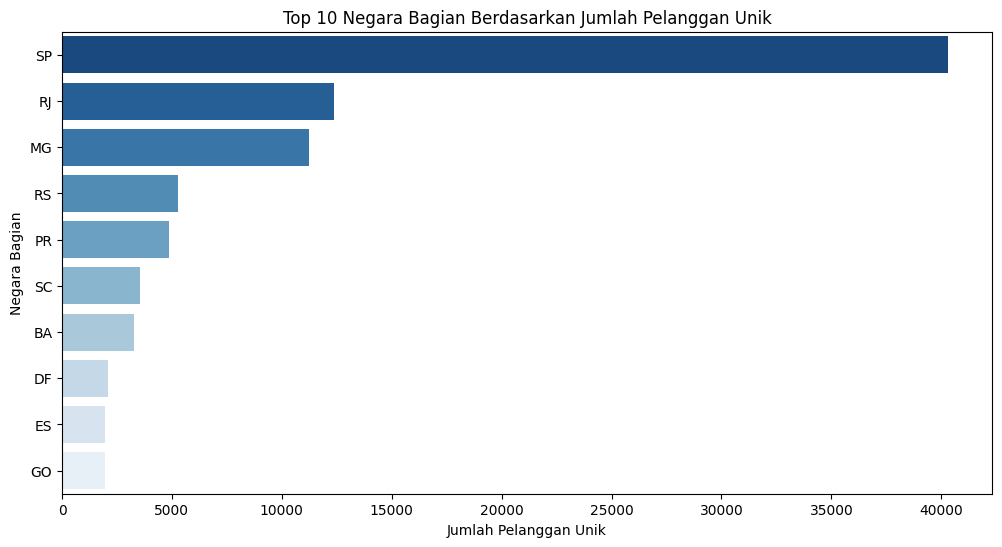

C:\Users\rafia\AppData\Local\Temp\ipykernel_15164\2202404272.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


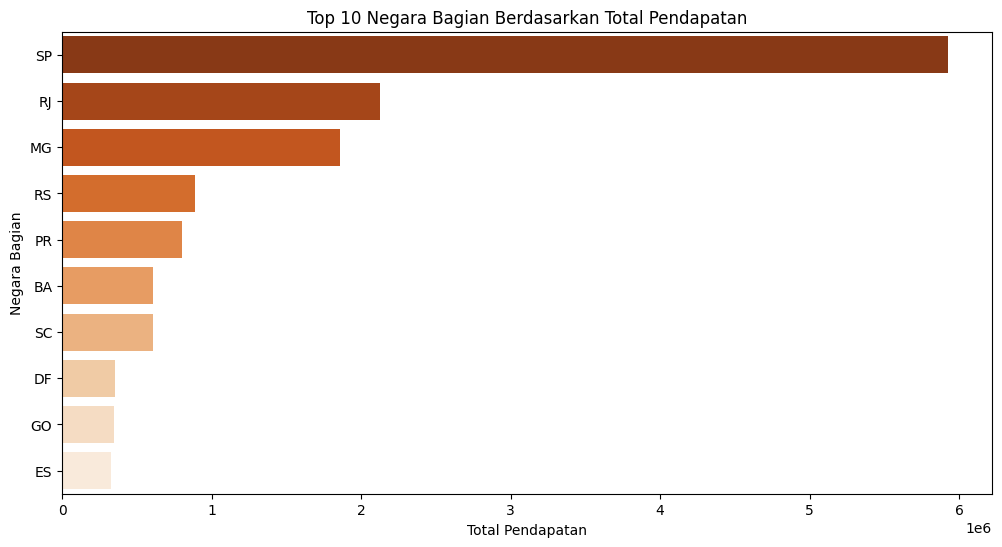

C:\Users\rafia\AppData\Local\Temp\ipykernel_15164\2202404272.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


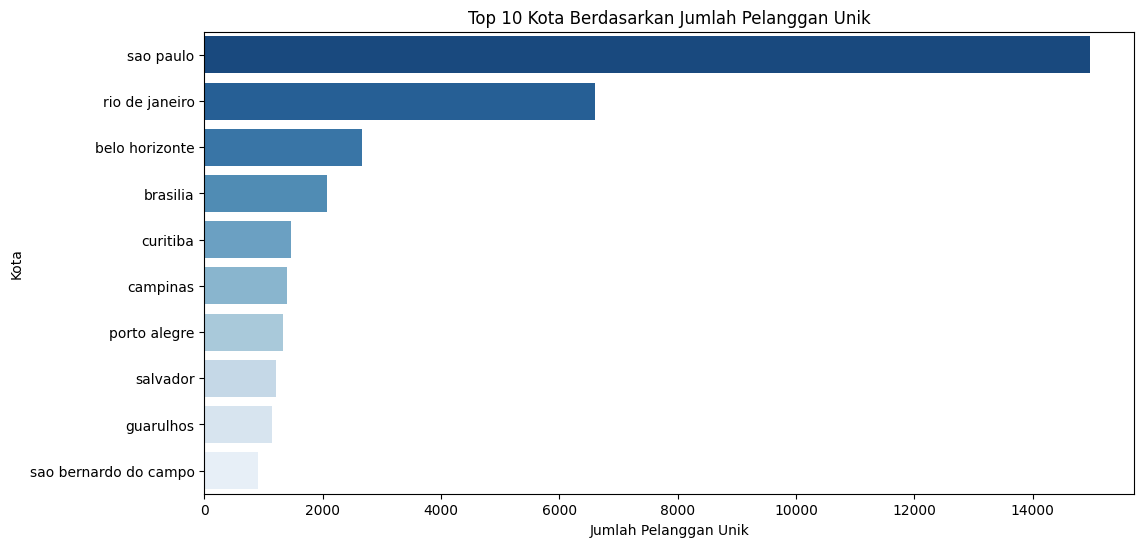

C:\Users\rafia\AppData\Local\Temp\ipykernel_15164\2202404272.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


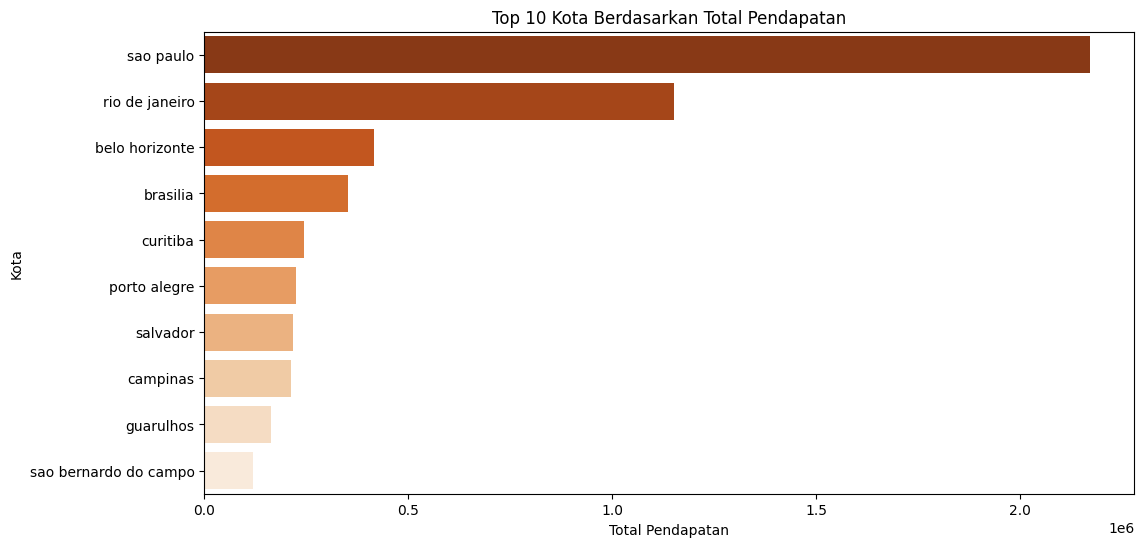

In [47]:
# Visualisasi: Top 10 Negara Bagian berdasarkan Jumlah Pelanggan
plt.figure(figsize=(12, 6))
sns.barplot(
    x='num_unique_customers',
    y='customer_state',
    data=state_customer_analysis.head(10),
    palette=sns.color_palette("Blues", n_colors=10)[::-1]
)
plt.title('Top 10 Negara Bagian Berdasarkan Jumlah Pelanggan Unik')
plt.xlabel('Jumlah Pelanggan Unik')
plt.ylabel('Negara Bagian')
plt.show()

# Visualisasi: Top 10 Negara Bagian berdasarkan Total Pendapatan
plt.figure(figsize=(12, 6))
sns.barplot(
    x='total_revenue',
    y='customer_state',
    data=state_customer_analysis.head(10).sort_values(
        by='total_revenue', ascending=False),
    palette=sns.color_palette("Oranges", n_colors=10)[::-1]
)
plt.title('Top 10 Negara Bagian Berdasarkan Total Pendapatan')
plt.xlabel('Total Pendapatan')
plt.ylabel('Negara Bagian')
plt.show()

# Visualisasi: Top 10 Kota berdasarkan Jumlah Pelanggan
plt.figure(figsize=(12, 6))
sns.barplot(
    x='num_unique_customers',
    y='customer_city',
    data=city_customer_analysis.head(10),
    palette=sns.color_palette("Blues", n_colors=10)[::-1]
)
plt.title('Top 10 Kota Berdasarkan Jumlah Pelanggan Unik')
plt.xlabel('Jumlah Pelanggan Unik')
plt.ylabel('Kota')
plt.show()

# Visualisasi: Top 10 Kota berdasarkan Total Pendapatan
plt.figure(figsize=(12, 6))
sns.barplot(
    x='total_revenue',
    y='customer_city',
    data=city_customer_analysis.head(10).sort_values(
        by='total_revenue', ascending=False),
    palette=sns.color_palette("Oranges", n_colors=10)[::-1]
)
plt.title('Top 10 Kota Berdasarkan Total Pendapatan')
plt.xlabel('Total Pendapatan')
plt.ylabel('Kota')
plt.show()

### 2. Produk apa yang paling diminati dan menguntungkan, serta bagaimana performa penjual terkait produk tersebut?

#### A. Analisis Kinerja Produk & Pengalaman Pembelian

Memvisualisasikan dalam dua grafik batang:
1. 10 kategori produk paling diminati (berdasarkan jumlah pesanan) 
2. 10 kategori produk paling menguntungkan (berdasarkan total pendapatan).

C:\Users\rafia\AppData\Local\Temp\ipykernel_15164\606900347.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


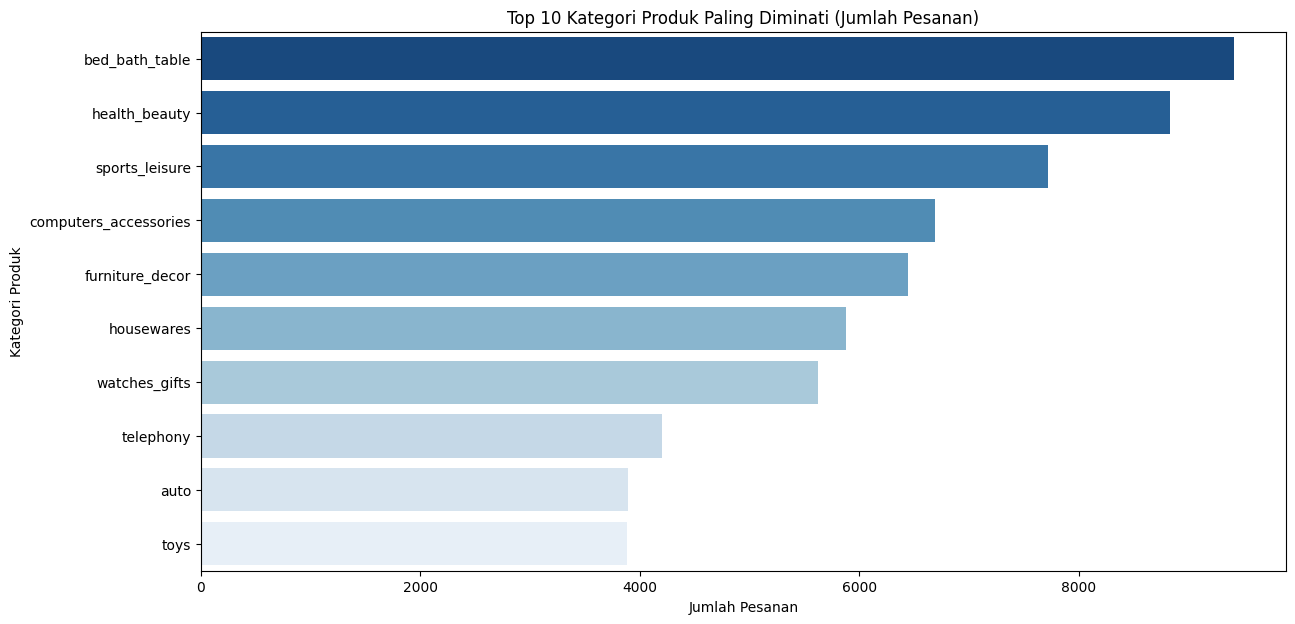

C:\Users\rafia\AppData\Local\Temp\ipykernel_15164\606900347.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


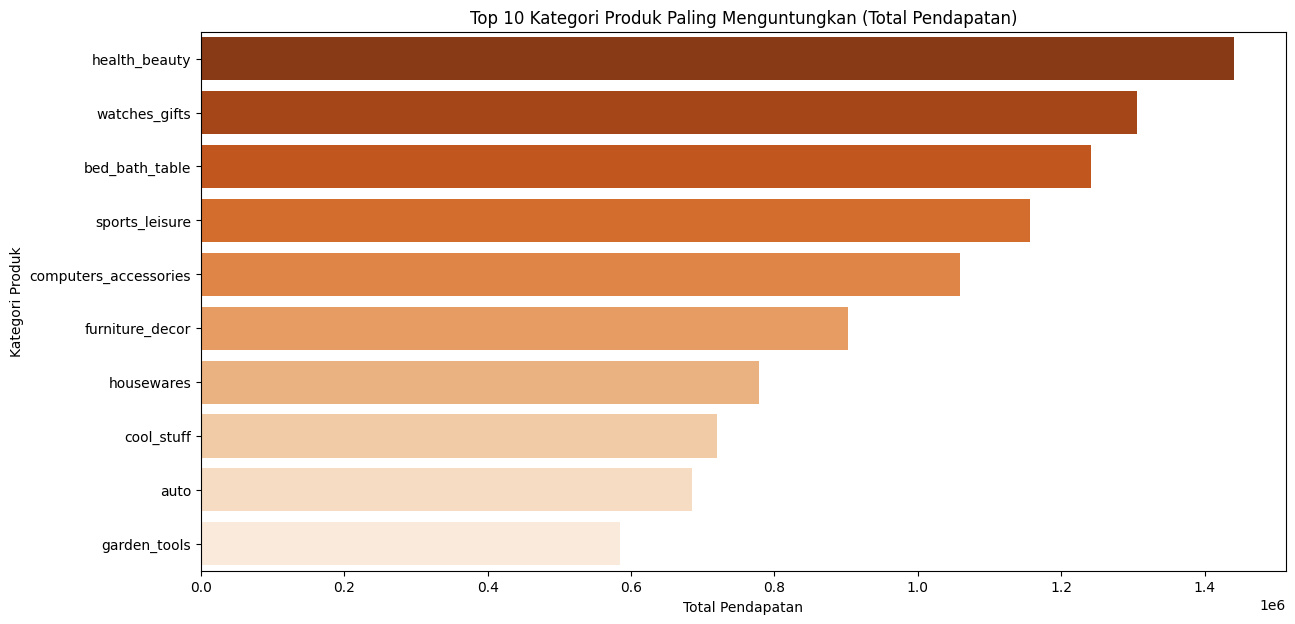

In [48]:
# Visualisasi: Top 10 Kategori Produk Paling Diminati
plt.figure(figsize=(14, 7))
sns.barplot(
    x='num_orders',
    y='product_category_name_english',
    data=top_popular_categories,
    palette=sns.color_palette("Blues", n_colors=10)[::-1]
)
plt.title('Top 10 Kategori Produk Paling Diminati (Jumlah Pesanan)')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.show()

# Visualisasi: Top 10 Kategori Produk Paling Menguntungkan
plt.figure(figsize=(14, 7))
sns.barplot(
    x='total_revenue',
    y='product_category_name_english',
    data=top_profitable_categories,
    palette=sns.color_palette("Oranges", n_colors=10)[::-1]
)
plt.title('Top 10 Kategori Produk Paling Menguntungkan (Total Pendapatan)')
plt.xlabel('Total Pendapatan')
plt.ylabel('Kategori Produk')
plt.show()

#### B: Analisis Performa Penjual dan Distribusi Ulasan

Untuk memahami distribusi keseluruhan dari skor ulasan yang diberikan oleh pelanggan, kita akan membuat histogram. Ini akan menunjukkan seberapa sering setiap skor ulasan (1 hingga 5) muncul.

C:\Users\rafia\AppData\Local\Temp\ipykernel_15164\4045709190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


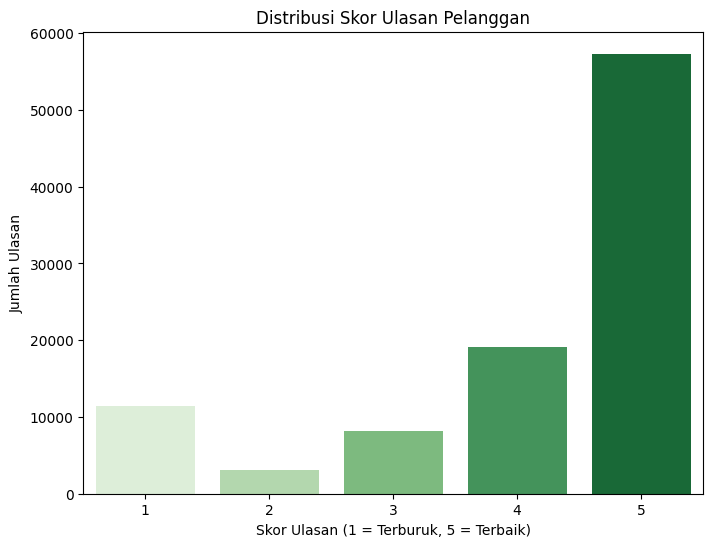

In [49]:
# Visualisasi: Distribusi Skor Ulasan Pelanggan
plt.figure(figsize=(8, 6))
sns.countplot(
    x='review_score',
    data=order_reviews_df,
    palette='Greens',

    order=sorted(order_reviews_df['review_score'].unique())
)
plt.title('Distribusi Skor Ulasan Pelanggan')
plt.xlabel('Skor Ulasan (1 = Terburuk, 5 = Terbaik)')
plt.ylabel('Jumlah Ulasan')
plt.show()

C:\Users\rafia\AppData\Local\Temp\ipykernel_15164\587900072.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


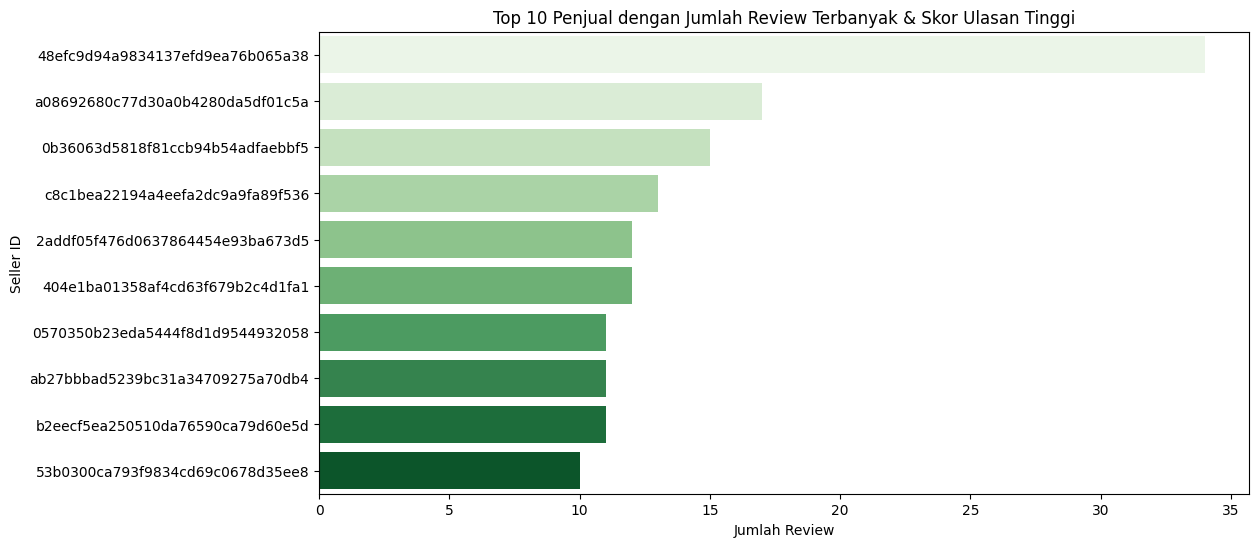

C:\Users\rafia\AppData\Local\Temp\ipykernel_15164\587900072.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


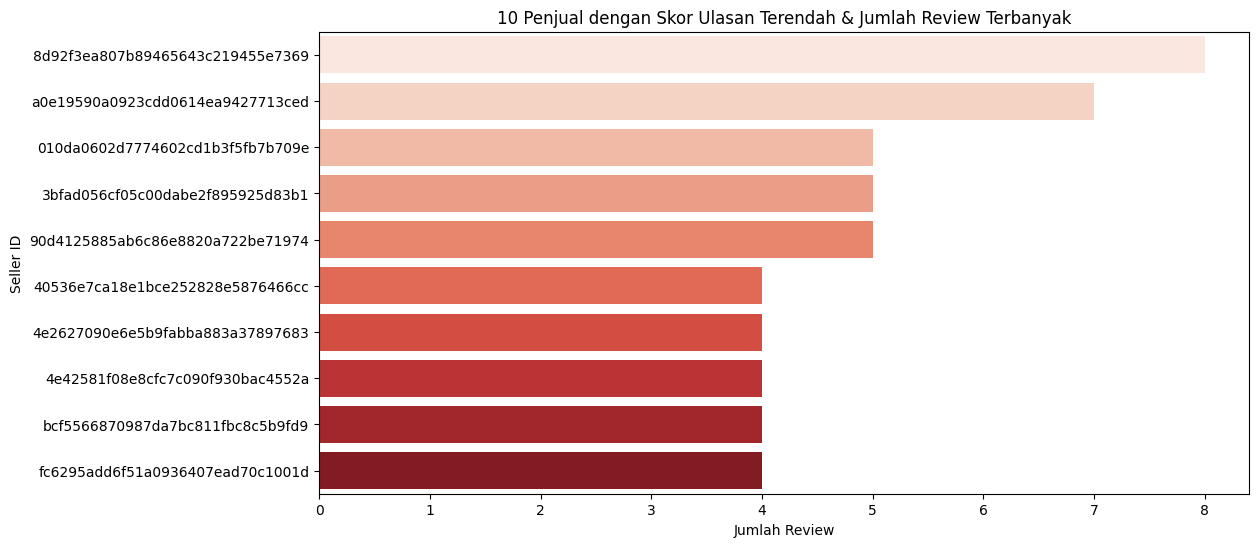

In [50]:
# Visualisasi 10 penjual TERATAS (berdasarkan num_reviews descending)
plt.figure(figsize=(12, 6))
# Ambil 10 penjual dengan jumlah review terbanyak & skor ulasan tinggi
top_10_sellers_by_score_and_reviews = seller_performance.sort_values(
    ['average_review_score', 'num_reviews'], ascending=[False, False]
).head(10)

sns.barplot(
    x='num_reviews',
    y='seller_id',
    data=top_10_sellers_by_score_and_reviews.sort_values('num_reviews', ascending=False),
    palette='Greens'
)
plt.title('Top 10 Penjual dengan Jumlah Review Terbanyak & Skor Ulasan Tinggi')
plt.xlabel('Jumlah Review')
plt.ylabel('Seller ID')
plt.show()

# Visualisasi 10 penjual dengan Skor Ulasan Terendah dan Jumlah Review Terbanyak
plt.figure(figsize=(12, 6))
# Ambil 10 penjual dengan skor ulasan terendah & jumlah review terbanyak
lowest_score_highest_reviews = seller_performance.sort_values(
    ['average_review_score', 'num_reviews'], ascending=[True, False]
).head(10)

sns.barplot(
    x='num_reviews',
    y='seller_id',
    data=lowest_score_highest_reviews.sort_values('num_reviews', ascending=False),
    palette='Reds'
)
plt.title('10 Penjual dengan Skor Ulasan Terendah & Jumlah Review Terbanyak')
plt.xlabel('Jumlah Review')
plt.ylabel('Seller ID')
plt.show()


## Analisis Lanjutan (Opsional)

### Geospatial Analysis

Analisis geospasial dilakukan untuk memahami distribusi pelanggan e-commerce di berbagai wilayah geografis (negara bagian dan kota) melalui visualisasi peta. Ini memungkinkan identifikasi area dengan kepadatan pelanggan tinggi atau rendah, yang menjadi dasar untuk menyesuaikan strategi promosi (misalnya, kampanye bertarget lokal) dan logistik (seperti penentuan lokasi gudang atau peningkatan efisiensi pengiriman), serta memudahkan pemangku kepentingan dalam memahami tren dan pola yang tidak terlihat dari data tabular saja.

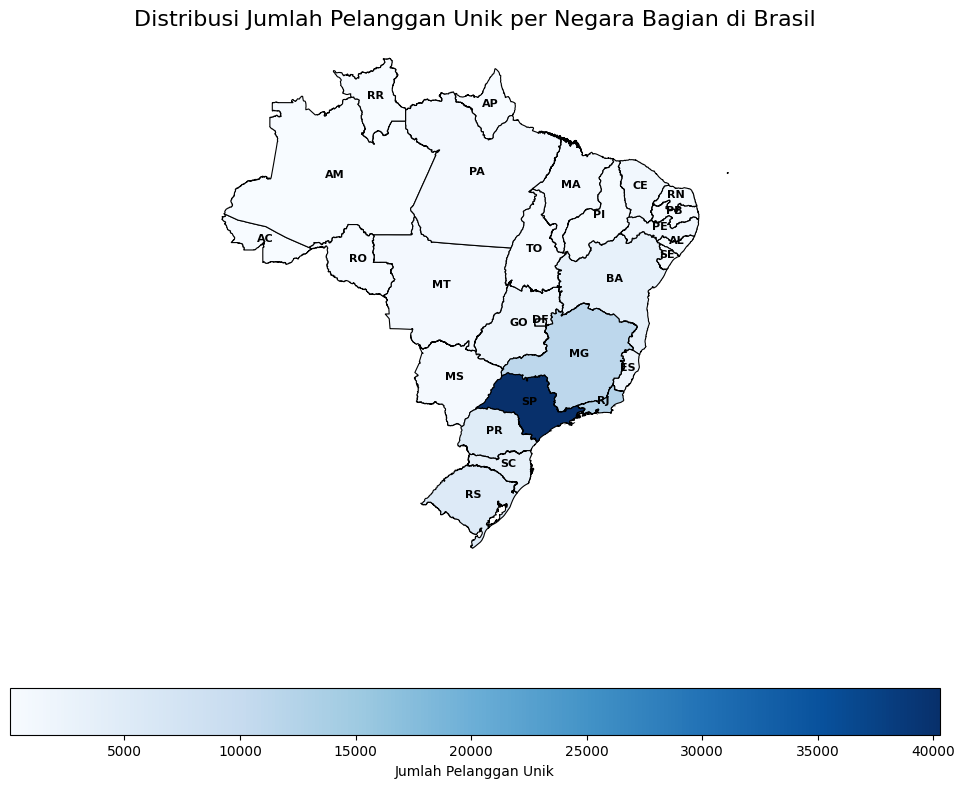

In [51]:
import geopandas as gpd

# Hitung jumlah pelanggan unik per negara bagian dari customer_summary
customer_counts = customer_summary.groupby(
    "customer_state")["customer_unique_id"].nunique().reset_index()
customer_counts.columns = ["state", "customer_count"]

# Load peta Brasil dari sumber online (GeoJSON)
url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
try:
    brazil_map = gpd.read_file(url)
except Exception as e:
    print(
        f"Error loading GeoJSON file: {e}. Please check the URL or your internet connection.")
    exit()

# Gabungkan data pelanggan dengan peta GeoDataFrame
# Kolom 'sigla' di brazil_map adalah singkatan negara bagian Brasil (e.g., "SP", "RJ")
brazil_map = brazil_map.merge(
    customer_counts, left_on="sigla", right_on="state", how="left")

# Isi nilai NaN (negara bagian tanpa pelanggan) dengan 0 untuk visualisasi yang bersih
brazil_map["customer_count"] = brazil_map["customer_count"].fillna(0)

# Plot peta choropleth
# Ukuran plot lebih besar untuk detail peta
fig, ax = plt.subplots(figsize=(12, 10))
brazil_map.plot(
    column="customer_count",    # Kolom yang akan digunakan untuk mewarnai peta
    # Skema warna (Blues: semakin gelap, semakin tinggi nilainya)
    cmap="Blues",
    linewidth=0.8,              # Ketebalan garis batas negara bagian
    edgecolor="black",          # Warna garis batas
    legend=True,                # Tampilkan legenda warna
    ax=ax,                      # Tentukan axes untuk plot
    legend_kwds={
        'label': "Jumlah Pelanggan Unik",
        'orientation': "horizontal"
    }  # Label legenda
)

# Tambahkan label nama negara bagian di tengah-tengah wilayahnya
# Gunakan centroid geometry untuk menentukan posisi teks
for idx, row in brazil_map.iterrows():
    if row["customer_count"] > 0:  # Hanya beri label untuk negara bagian yang punya pelanggan
        x, y = row.geometry.centroid.x, row.geometry.centroid.y
        # Sesuaikan fontsize dan color agar mudah terbaca
        ax.text(x, y, row["sigla"], fontsize=8, ha="center",
                color="black", fontweight="bold")

ax.set_title(
    "Distribusi Jumlah Pelanggan Unik per Negara Bagian di Brasil", fontsize=16)
ax.axis("off")  # Sembunyikan sumbu x dan y

plt.show()

#### Insight
Peta secara visual mengkonfirmasi bahwa distribusi pelanggan sangat terkonsentrasi di wilayah Tenggara (khususnya São Paulo) dan Selatan Brasil, ditunjukkan dengan warna biru gelap yang dominan. Wilayah utara dan sebagian besar timur laut menunjukkan jumlah pelanggan yang jauh lebih sedikit, mengindikasikan potensi besar untuk ekspansi pasar di area-area tersebut.

## Kesimpulan

### 1. Distribusi Pelanggan dan Karakteristik Pembelian Mereka
1. Mayoritas pelanggan dan kontribusi pendapatan terbesar terkonsentrasi kuat di wilayah São Paulo (negara bagian dan kota), yang menjadikannya pusat aktivitas utama bagi bisnis . Ini menunjukkan bahwa São Paulo adalah pasar inti dengan basis pelanggan yang sangat besar.
2. Meskipun São Paulo mendominasi volume pelanggan, teridentifikasi potensi nilai tinggi di negara bagian lain seperti Bahia dan Goiás. Negara bagian ini menunjukkan rata-rata pengeluaran per pelanggan yang lebih tinggi, meskipun dengan jumlah pelanggan yang relatif lebih sedikit, mengindikasikan adanya segmen pelanggan premium di sana.
3. Volume pelanggan dan penjualan yang tinggi, khususnya di São Paulo, sebagian besar didorong oleh banyaknya pelanggan unik yang cenderung melakukan satu atau sedikit pembelian. Hal ini menunjukkan bahwa ada peluang besar untuk meningkatkan loyalitas dan pembelian berulang dari basis pelanggan yang ada.
4. Peta secara visual mengkonfirmasi bahwa distribusi pelanggan sangat terpusat di wilayah Tenggara dan Selatan Brasil. Ini menunjukkan penetrasi pasar yang kuat di area tersebut, namun juga mengindikasikan bahwa wilayah lain (seperti Utara dan sebagian Timur Laut Brasil) masih memiliki penetrasi yang rendah dan merupakan pasar yang belum banyak tergarap.

### 2. Produk yang Paling Diminati dan Menguntungkan, serta Performa Penjual Terkait
1. Kategori seperti "bed_bath_table, health_beauty, dan sports_leisure" secara konsisten merupakan yang paling banyak diminati pelanggan (terlaris) dan juga paling menguntungkan. 
2. Meskipun kepuasan pelanggan secara keseluruhan cenderung tinggi (mayoritas ulasan memberikan skor positif), terdapat disparitas signifikan dalam performa penjual. Ini menunjukkan bahwa ada penjual yang secara konsisten memberikan layanan atau produk yang sangat baik, namun juga ada yang memerlukan intervensi dan perbaikan.

## Saran Bisnis

- Kembangkan program loyalitas dan insentif untuk mendorong pembelian berulang, terutama di pasar padat pelanggan seperti São Paulo, untuk mengubah pembeli satu kali menjadi pelanggan setia.
- Alokasikan sumber daya pemasaran dan penawaran produk premium ke negara bagian dengan rata-rata pengeluaran per pelanggan yang lebih tinggi seperti Bahia dan Goiás untuk memaksimalkan nilai dari setiap pelanggan.
- Tingkatkan stok dan promosi untuk kategori produk terlaris dan paling menguntungkan guna memenuhi permintaan pasar yang dominan.
- Berikan insentif kepada penjual berkinerja tinggi sebagai apresiasi dan untuk mempertahankan standar kualitas.
- Identifikasi dan berikan dukungan (misalnya, pelatihan, bimbingan) kepada penjual dengan ulasan buruk untuk membantu mereka meningkatkan kualitas layanan atau produk.
- Investigasi penyebab ulasan negatif yang konsisten untuk perbaikan sistemik.
- Pertimbangkan untuk mengembangkan strategi pemasaran dan logistik yang ditargetkan untuk **wilayah yang saat ini memiliki penetrasi rendah** (misalnya, wilayah Utara dan sebagian Timur Laut Brasil) untuk membuka pasar baru.
- Manfaatkan _insight_ geospasial untuk menempatkan gudang atau pusat distribusi secara strategis, serta untuk meluncurkan kampanye promosi yang sangat relevan dan bertarget geografis.